Definimos las funciones que necesitamos para el procesamiento de datos.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from lib import get_filepath, get_thermodinamic_df, get_pressure

Extraemos las mediciones de presión de los archivos de salida de LAMMPS.

In [2]:
volume = 9000000
sufix = '__termodinamica'
temperatures = tuple(range(100, 2000 + 1, 100,))
pressures = []

for temperature in temperatures:
  filepath = get_filepath(temperature, volume, sufix)
  thermodinamic_df = get_thermodinamic_df(filepath)
  pressure = get_pressure(thermodinamic_df)
  pressures.append(pressure)

Graficamos estos datos.

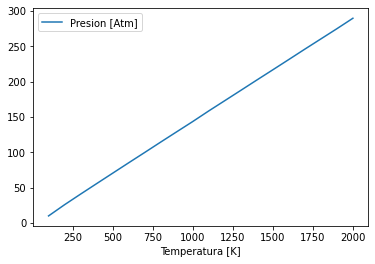

In [4]:
df = pd.DataFrame({'Temperatura [K]': temperatures, 'Presion [Atm]': pressures})
df.plot(x='Temperatura [K]', y='Presion [Atm]')

plt.savefig('../dat/temperatureAndPressure.png')

Podemos observar que existe una relación lineal entre la temperatura del gas de Argon y la presión que ejerce.